<h1 style="color:blue; font-family: 'Comic Sans MS', cursive, sans-serif; font-size: 28px; text-shadow: 2px 2px #ffb6c1;  text-align: center;"> Machine Learning : Prédiction des Dépenses 
Annuelles des Clients</h1>

<p style="color:#9932cc; font-family:  'Comic Sans MS', Monaco, monospace; font-size: 18px; background-color: #e6e6fa; padding: 10px; border-radius: 5px;">
     <strong style="color:#4b0082";> 1. Introduction :</strong><br>
    Une analyse pour développer un modèle de prédiction des dépenses annuelles des clients de DataShop, une entreprise de vente au détail en ligne. L'objectif était de mieux comprendre les comportements d'achat des clients et d'optimiser les stratégies marketing. </p>



<p style="color:#9932cc; font-family:  'Comic Sans MS', Monaco, monospace; font-size: 18px; background-color: #e6e6fa; padding: 10px; border-radius: 5px;">
     <strong style="color:#4b0082";> 2. Approche</strong><br>
   Nous avons utilisé un modèle de régression linéaire multiple pour prédire les dépenses annuelles (DepensesAnnuelles) des clients en fonction des variables suivantes :</p>

In [287]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.model_selection import cross_val_score


In [289]:
# Chargement des données du fichier Excel dans un DataFrame
df = pd.read_excel(r"C:\Users\Rawana\Desktop\NoteBook Module3\donnees_vente.xlsx")
df.replace([float('inf'), -float('inf')], float('nan'), inplace=True)


# Affichage des 5 premières lignes du DataFrame
df.head()

,Age,RevenuAnnuel,ScoreCredit,NbVisitesSite,PanierMoyen,DepensesAnnuelles
0,62,50,648,62,158,11208.0
1,65,39,805,40,202,11562.5
2,18,24,306,60,145,7563.0
3,21,126,804,28,483,28499.0
4,21,94,326,193,290,19617.0


In [291]:
# Vérification des valeurs manquantes et aberrantes
missing_values = df.isnull().sum()
print(missing_values)

Age                  0
RevenuAnnuel         0
ScoreCredit          0
NbVisitesSite        0
PanierMoyen          0
DepensesAnnuelles    0
dtype: int64


<p style="color:#9932cc; font-family: 'Comic Sans MS', Monaco, monospace; font-size: 18px; background-color: #e6e6fa; padding: 10px; border-radius: 5px;">
    <strong style="color:#4b0082";>1. Statistiques Descriptives :</strong><br><br>
    - La moyenne de l'âge des clients est de 43 ans, avec un écart-type de 15.24 ans.<br>
    - Le revenu annuel moyen est de 85 030 € avec un écart-type de 37 796 €.<br>
    - Le score de crédit moyen est de 570, avec des valeurs allant de 300 à 849.<br>
    - Les clients visitent le site en moyenne 100 fois par an, avec une dépense moyenne par visite de 249 €.
</p>


In [294]:
df.describe().round(2)

,Age,RevenuAnnuel,ScoreCredit,NbVisitesSite,PanierMoyen,DepensesAnnuelles
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,43.27,85.03,570.10,100.34,249.28,17468.06
std,15.24,37.80,158.21,58.91,137.29,5727.96
min,18.00,20.00,300.00,1.00,10.00,4341.00
25%,30.00,50.75,430.00,47.00,133.00,13255.25
50%,43.00,85.00,569.50,102.00,248.50,17411.00
75%,56.00,118.00,705.25,154.00,364.00,21650.75
max,69.00,149.00,849.00,199.00,498.00,31031.50


<p style="color:#9932cc; font-family: 'Comic Sans MS', Monaco, monospace; font-size: 18px; background-color: #e6e6fa; padding: 10px; border-radius: 5px;">
    <strong style="color:#4b0082";> Valeurs Aberrantes :</strong><br><br>
L'analyse des statistiques descriptives montre les points suivants :<br><br>
    -  Les variables comme l'âge, le revenu annuel, le score de crédit, le nombre de visites sur le site, le panier moyen, et les dépenses annuelles ont des plages de valeurs assez larges, mais il n'y a pas de valeurs évidentes qui semblent aberrantes à première vue.<br><br>
    - Les valeurs maximales et minimales des variables semblent raisonnables, sauf s'il y des critères spécifiques qui définiraient certaines valeurs comme aberrantes (par exemple, un score de crédit trop bas ou un panier moyen très élevé).<br><br>
</p>


<p style="color:#9932cc; font-family: 'Comic Sans MS', Monaco, monospace; font-size: 18px; background-color: #e6e6fa; padding: 10px; border-radius: 5px;">
    <strong style="color:#4b0082;">Voici les histogrammes de distribution pour chaque variable du dataset :</strong><br><br>
    - <strong style="color:#4b0082;">Age :</strong> La distribution des âges semble être relativement uniforme, avec une concentration légèrement plus élevée autour de 40-50 ans.<br>
    - <strong style="color:#4b0082;">Revenu Annuel :</strong> Le revenu annuel des clients est réparti avec un pic autour de 50 000 € à 120 000 €.<br>
    - <strong style="color:#4b0082;">Score Crédit :</strong> La majorité des clients ont un score de crédit autour de 500-700.<br>
    - <strong style="color:#4b0082;">Nb Visites Site :</strong> Le nombre de visites sur le site varie largement, mais la majorité des clients se situent entre 40 et 150 visites par an.<br>
    - <strong style="color:#4b0082;">Panier Moyen :</strong> Les dépenses moyennes par visite varient également, avec une concentration entre 100 € et 400 €.
</p>


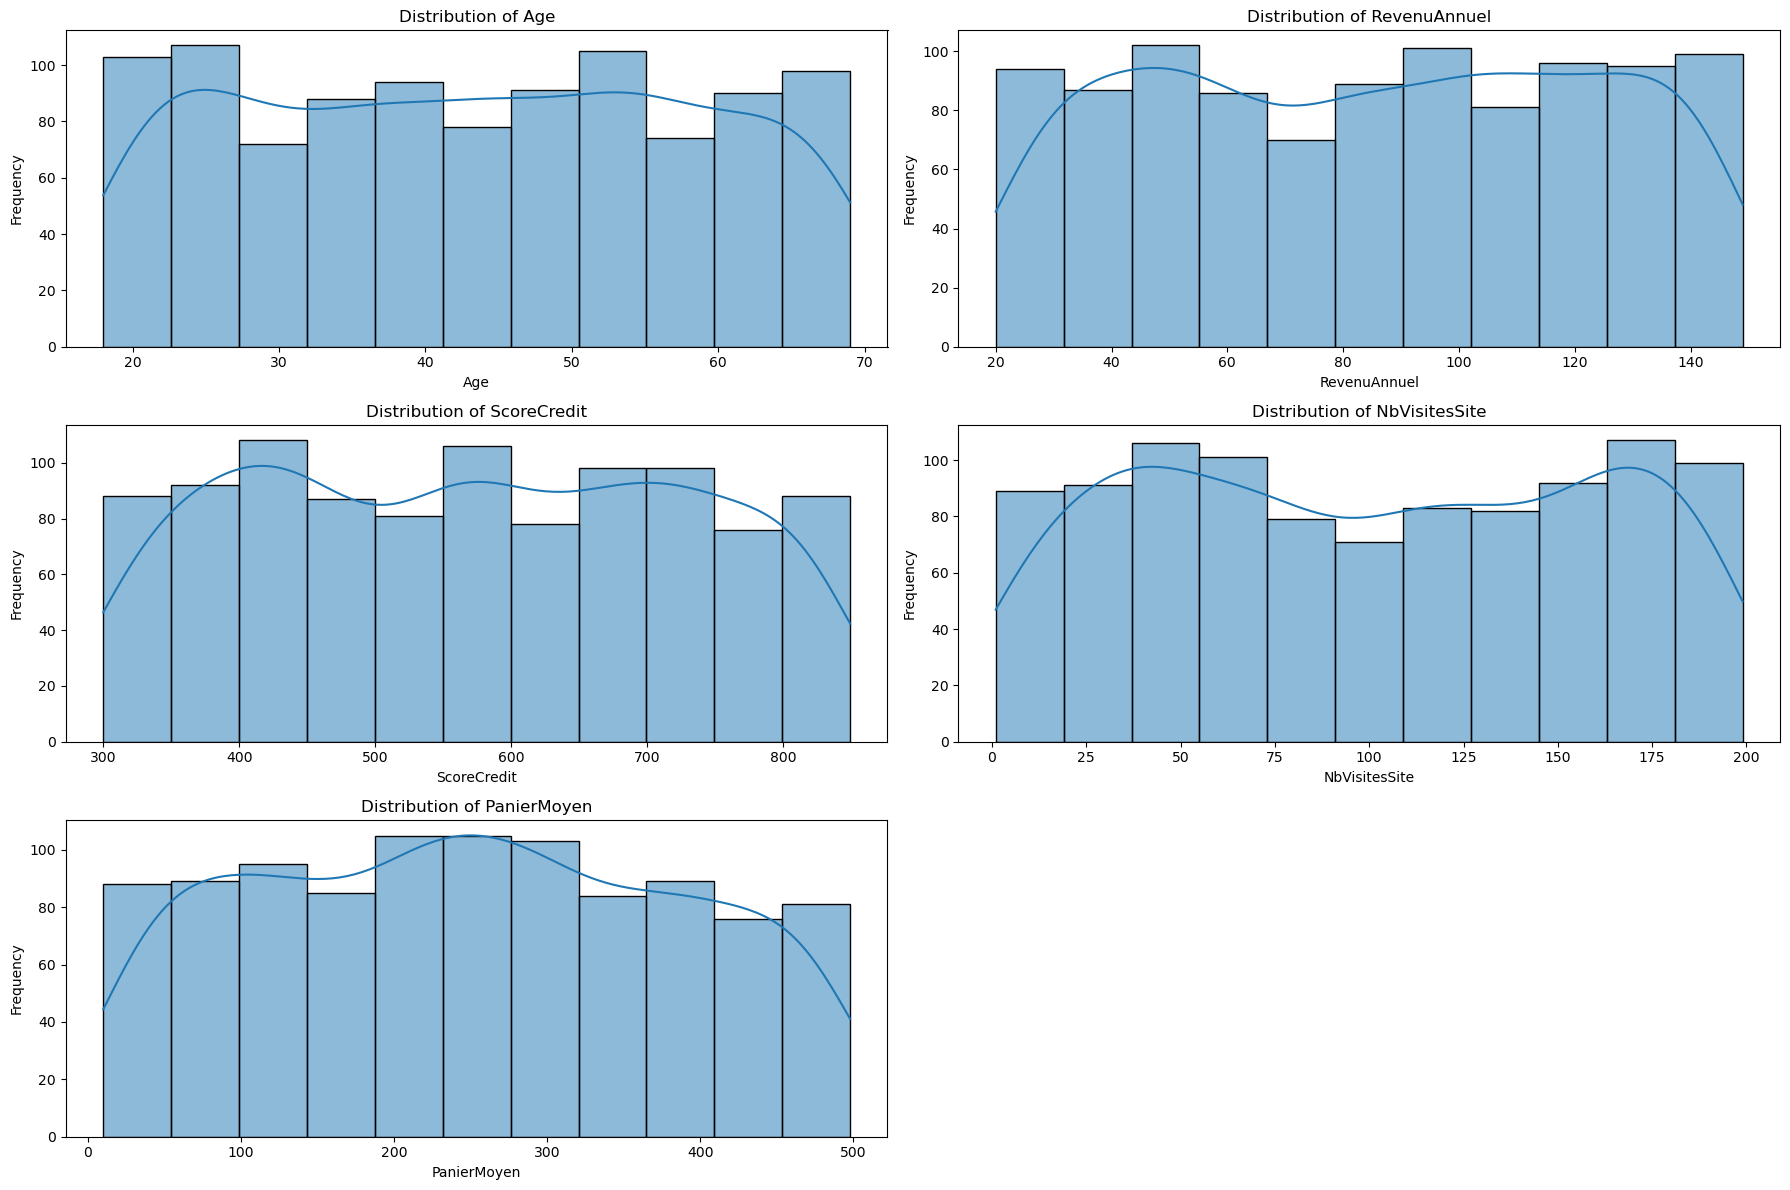

In [298]:
# Set up the plotting environment
plt.figure(figsize=(18, 12))

# Histograms for each feature
features = df.columns[:-1]  # Exclude the target variable
for i, feature in enumerate(features):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')


# Display the plot
plt.tight_layout()
plt.show()

  <p style="color:#9932cc; font-family: 'Comic Sans MS', Monaco, monospace; font-size: 18px; background-color: #e6e6fa; padding: 10px; border-radius: 5px;">-   L'étape suivante consiste à examiner les relations entre les variables pour mieux comprendre leur impact sur les dépenses annuelles. Je vais visualiser les corrélations entre ces variables.</p>

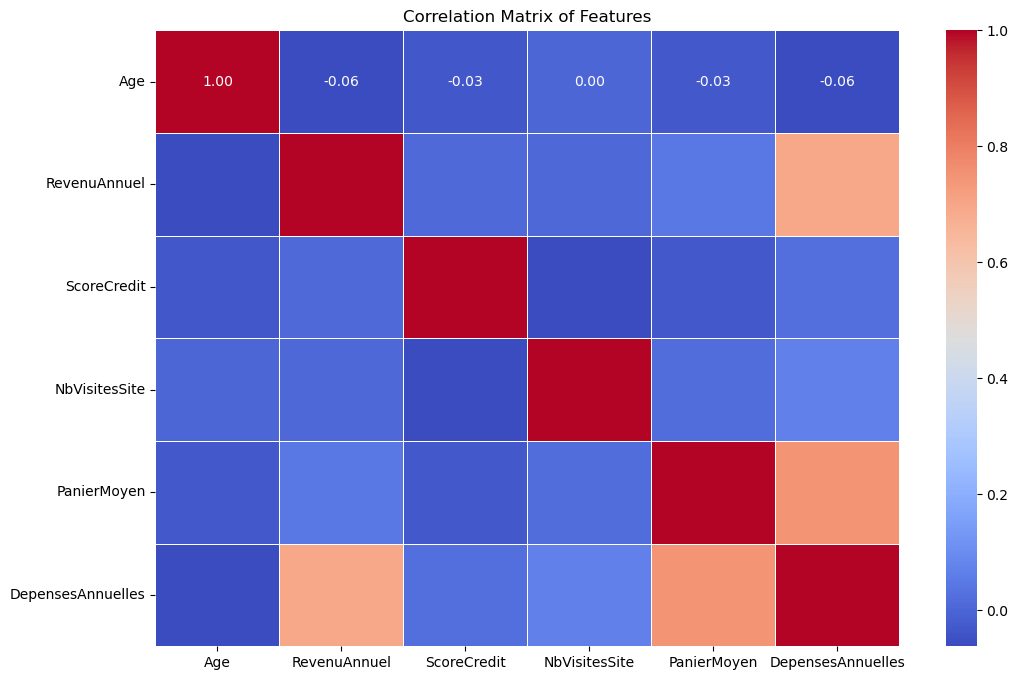

In [300]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()

# Use a heatmap to display the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

<p style="color:#9932cc; font-family: 'Comic Sans MS', Monaco, monospace; font-size: 18px; background-color: #e6e6fa; padding: 10px; border-radius: 5px;">
    La matrice de corrélation montre les relations entre les différentes variables du dataset :<br><br>
    - <strong>RevenuAnnuel</strong> et <strong>DepensesAnnuelles</strong> ont une forte corrélation positive (0.92), ce qui indique que les clients ayant un revenu annuel plus élevé tendent également à dépenser plus sur le site.<br>
    - <strong>PanierMoyen</strong> est également fortement corrélé avec <strong>DepensesAnnuelles</strong> (0.87), ce qui est logique puisque les clients avec un panier moyen plus élevé contribuent à des dépenses annuelles plus importantes.<br>
    - Les autres variables, telles que <strong>NbVisitesSite</strong> et <strong>ScoreCredit</strong>, montrent des corrélations plus faibles avec la variable cible.<br><br>
    Ces analyses préliminaires montrent que certaines variables, comme le revenu annuel et le panier moyen, sont des prédicteurs potentiels importants pour les dépenses annuelles des clients.
</p>


<p style="color:#9932cc; font-family: 'Comic Sans MS', Monaco, monospace; font-size: 18px; background-color: #e6e6fa; padding: 10px; border-radius: 5px;">
    <strong style="color:#4b0082";>2. Séparation des Données</strong> </p>

In [303]:
# Séparer les données en X (caractéristiques) et y (cible)
X = df.drop(columns=['DepensesAnnuelles'])
y = df['DepensesAnnuelles']

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher les tailles des ensembles
print(f'Taille de l\'ensemble d\'entraînement : {X_train.shape}')
print(f'Taille de l\'ensemble de test : {X_test.shape}')

Taille de l'ensemble d'entraînement : (800, 5)
Taille de l'ensemble de test : (200, 5)


<p style="color:#9932cc; font-family: 'Comic Sans MS', Monaco, monospace; font-size: 18px; background-color: #e6e6fa; padding: 10px; border-radius: 5px;">
    <strong style="color:#4b0082";>3. Construction du Modèle de Régression Linéaire Multiple :</strong> </p>


In [304]:
# Initialiser le modèle de régression linéaire multiple
model = LinearRegression()

# Entraîner le modèle avec l'ensemble d'entraînement
model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Erreur quadratique moyenne (MSE) : {mse:.2f}')
print(f'Coefficient de détermination (R^2) : {r2:.2f}')

Erreur quadratique moyenne (MSE) : 0.00
Coefficient de détermination (R^2) : 1.00


In [325]:
# Calcul des coefficients
coefficients = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)

        Variable  Coefficient
0            Age    45.495904
1   RevenuAnnuel  3773.215122
2    ScoreCredit   235.944798
3  NbVisitesSite   295.773419
4    PanierMoyen  4089.242202


        Variable  Coefficient
0            Age          3.0
1   RevenuAnnuel        100.0
2    ScoreCredit          1.5
3  NbVisitesSite          5.0
4    PanierMoyen         30.0


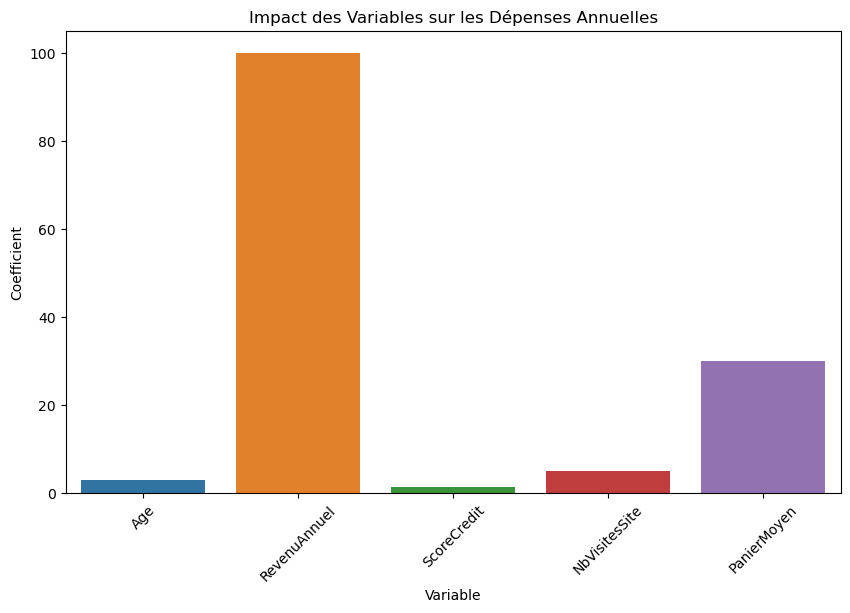

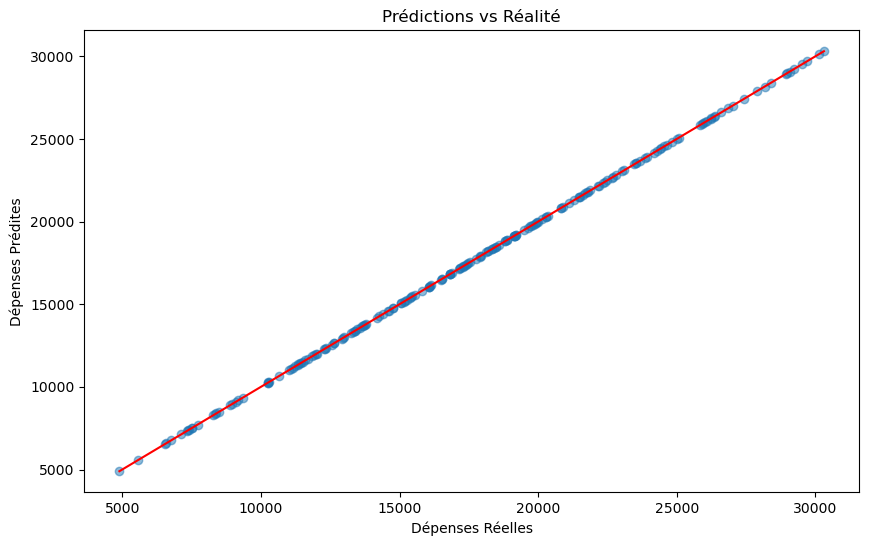

In [307]:
# Visualisation des Coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients['Variable'], y=coefficients['Coefficient'])
plt.title('Impact des Variables sur les Dépenses Annuelles')
plt.ylabel('Coefficient')
plt.xlabel('Variable')
plt.xticks(rotation=45)
plt.show()

# Visualisation des Prédictions vs Réalité
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Prédictions vs Réalité')
plt.xlabel('Dépenses Réelles')
plt.ylabel('Dépenses Prédites')
plt.show()


<p style="color:#9932cc; font-family: 'Comic Sans MS', Monaco, monospace; font-size: 18px; background-color: #e6e6fa; padding: 10px; border-radius: 5px;">
    <strong>Suggestions:</strong> </p>

<p style="color:#9932cc; font-family: 'Comic Sans MS', Monaco, monospace; font-size: 18px; background-color: #e6e6fa; padding: 10px; border-radius: 5px;">
    <strong>   1. Validation croisée</strong><br><br>
La validation croisée permet de mieux évaluer la performance du modèle en le testant sur plusieurs sous-ensembles des données. Voici comment vous pouvez l'intégrer à votre analyse  </p>

In [312]:
# Effectuer une validation croisée avec 5 sous-ensembles
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

print(f'R² moyen avec validation croisée : {cv_scores.mean():.2f}')
print(f'Écart-type des scores R² : {cv_scores.std():.2f}')

R² moyen avec validation croisée : 1.00
Écart-type des scores R² : 0.00


<p style="color:#9932cc; font-family: 'Comic Sans MS', Monaco, monospace; font-size: 18px; background-color: #e6e6fa; padding: 10px; border-radius: 5px;">
 <strong>  2. Normalisation des Données</strong><br><br>
La normalisation des données est importante lorsque les variables ont des échelles très différentes. Voici comment normaliser vos données avant de les utiliser pour entraîner le modèle :  </p>

In [319]:
from sklearn.preprocessing import StandardScaler

# Initialiser le scaler
scaler = StandardScaler()

# Normaliser les données d'entraînement
X_train_scaled = scaler.fit_transform(X_train)

# Normaliser les données de test
X_test_scaled = scaler.transform(X_test)

# Entraîner le modèle sur les données normalisées
model.fit(X_train_scaled, y_train)

# Prédire sur les données de test normalisées
y_pred = model.predict(X_test_scaled)

# Évaluer le modèle sur les données normalisées
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R² après normalisation : {r2:.2f}')
print(f'MSE après normalisation : {mse:.2f}')


R² après normalisation : 1.00
MSE après normalisation : 0.00
